REALIZED VARIANCE PREDICTION ANALYSIS

1. BASIC STATISTICS (Annualized Volatility)
------------------------------------------------------------
Predicted Vol - Mean: 0.1230 (12.30%)
Predicted Vol - Median: 0.1167 (11.67%)
Predicted Vol - Std: 0.0306
Predicted Vol - Min: 0.0771 (7.71%)
Predicted Vol - Max: 0.2751 (27.51%)

Actual Vol - Mean: 0.1071 (10.71%)
Actual Vol - Median: 0.0916 (9.16%)
Actual Vol - Std: 0.0677

2. PREDICTION BIAS
------------------------------------------------------------
Mean Error (Predicted - Actual): 0.0160 (1.60%)
Median Error: 0.0271 (2.71%)
Mean Absolute Error: 0.0419
Root Mean Squared Error: 0.0601

Over-predictions: 170 (72.3%)
Under-predictions: 65 (27.7%)

3. COMPARISON TO MARKET IMPLIED VOLATILITY
------------------------------------------------------------
Market Average IV (from backtest): 27.00%
Your Average Predicted Vol: 12.30%
Difference: -14.70%

Days where predicted vol < 27.00%: 234 (99.6%)
Days where predicted vol > 27.00%: 1 (0.4%)

4. TEM

/var/folders/5w/sk_z507j78j69yh904rh10440000gn/T/ipykernel_48610/4166081094.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regime_analysis = forecast_df.groupby('actual_regime').agg({


✓ Saved visualization to rv_prediction_analysis.png

CONCLUSION
Your model OVER-predicts realized volatility by 1.60% on average.

Your predictions (12.30%) are consistently LOWER than
market implied volatility (27.00%) by 14.70%.

This suggests:
  1. Market may be overpricing volatility
  2. A SHORT volatility strategy (selling options) might be profitable
  3. Buying volatility won't generate trades with positive threshold


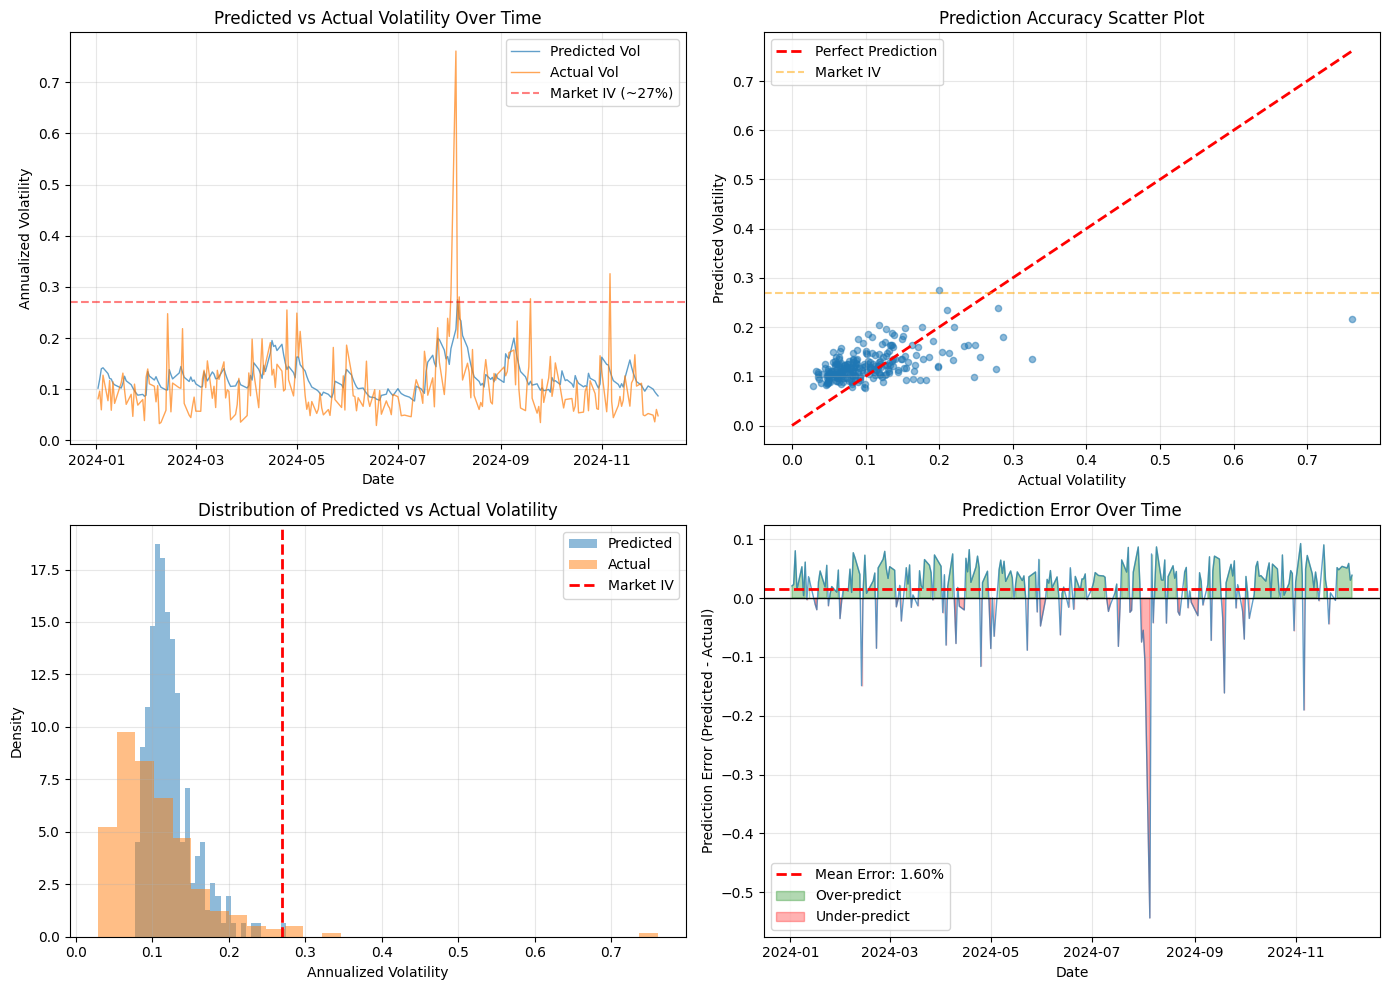

In [2]:
import pandas as pd
import numpy as np
import polars as pl
from pathlib import Path
from gmsm.models.mdsv.src.backtester import OptionsBacktester

# Load data with Polars and convert to pandas
root = Path().resolve().parent.parent
cboe_path = root / 'gmsm' / 'data' / 'cboe'
forecast_df = pd.read_csv(root / 'data' / 'results' / 'forecasts.csv')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load forecast data
forecast_df = pd.read_csv(root / 'data' / 'results' / 'forecasts.csv')

print("="*60)
print("REALIZED VARIANCE PREDICTION ANALYSIS")
print("="*60)

# Convert RV to annualized volatility
forecast_df['predicted_vol_ann'] = np.sqrt(forecast_df['predicted_rv'] * 252) / 100
forecast_df['actual_vol_ann'] = np.sqrt(forecast_df['actual_rv'] * 252) / 100

# Basic statistics
print("\n1. BASIC STATISTICS (Annualized Volatility)")
print("-"*60)
print(f"Predicted Vol - Mean: {forecast_df['predicted_vol_ann'].mean():.4f} ({forecast_df['predicted_vol_ann'].mean()*100:.2f}%)")
print(f"Predicted Vol - Median: {forecast_df['predicted_vol_ann'].median():.4f} ({forecast_df['predicted_vol_ann'].median()*100:.2f}%)")
print(f"Predicted Vol - Std: {forecast_df['predicted_vol_ann'].std():.4f}")
print(f"Predicted Vol - Min: {forecast_df['predicted_vol_ann'].min():.4f} ({forecast_df['predicted_vol_ann'].min()*100:.2f}%)")
print(f"Predicted Vol - Max: {forecast_df['predicted_vol_ann'].max():.4f} ({forecast_df['predicted_vol_ann'].max()*100:.2f}%)")

print(f"\nActual Vol - Mean: {forecast_df['actual_vol_ann'].mean():.4f} ({forecast_df['actual_vol_ann'].mean()*100:.2f}%)")
print(f"Actual Vol - Median: {forecast_df['actual_vol_ann'].median():.4f} ({forecast_df['actual_vol_ann'].median()*100:.2f}%)")
print(f"Actual Vol - Std: {forecast_df['actual_vol_ann'].std():.4f}")

# Prediction bias
print("\n2. PREDICTION BIAS")
print("-"*60)
forecast_df['prediction_error'] = forecast_df['predicted_vol_ann'] - forecast_df['actual_vol_ann']
print(f"Mean Error (Predicted - Actual): {forecast_df['prediction_error'].mean():.4f} ({forecast_df['prediction_error'].mean()*100:.2f}%)")
print(f"Median Error: {forecast_df['prediction_error'].median():.4f} ({forecast_df['prediction_error'].median()*100:.2f}%)")
print(f"Mean Absolute Error: {forecast_df['prediction_error'].abs().mean():.4f}")
print(f"Root Mean Squared Error: {np.sqrt((forecast_df['prediction_error']**2).mean()):.4f}")

# Count over/under predictions
over_predictions = (forecast_df['predicted_vol_ann'] > forecast_df['actual_vol_ann']).sum()
under_predictions = (forecast_df['predicted_vol_ann'] < forecast_df['actual_vol_ann']).sum()
print(f"\nOver-predictions: {over_predictions} ({over_predictions/len(forecast_df)*100:.1f}%)")
print(f"Under-predictions: {under_predictions} ({under_predictions/len(forecast_df)*100:.1f}%)")

# Compare to market IV (approximate based on your backtest output showing ~27% average IV)
market_avg_iv = 0.27
print("\n3. COMPARISON TO MARKET IMPLIED VOLATILITY")
print("-"*60)
print(f"Market Average IV (from backtest): {market_avg_iv:.2%}")
print(f"Your Average Predicted Vol: {forecast_df['predicted_vol_ann'].mean():.2%}")
print(f"Difference: {(forecast_df['predicted_vol_ann'].mean() - market_avg_iv):.2%}")
print(f"\nDays where predicted vol < {market_avg_iv:.2%}: {(forecast_df['predicted_vol_ann'] < market_avg_iv).sum()} ({(forecast_df['predicted_vol_ann'] < market_avg_iv).sum()/len(forecast_df)*100:.1f}%)")
print(f"Days where predicted vol > {market_avg_iv:.2%}: {(forecast_df['predicted_vol_ann'] > market_avg_iv).sum()} ({(forecast_df['predicted_vol_ann'] > market_avg_iv).sum()/len(forecast_df)*100:.1f}%)")

# Time series analysis
print("\n4. TEMPORAL PATTERNS")
print("-"*60)
forecast_df['date'] = pd.to_datetime(forecast_df['date'])
forecast_df['month'] = forecast_df['date'].dt.to_period('M')
monthly_avg = forecast_df.groupby('month').agg({
    'predicted_vol_ann': 'mean',
    'actual_vol_ann': 'mean'
})
print("\nMonthly Average Volatility:")
print(monthly_avg)

# Quartile analysis
print("\n5. PREDICTION BY QUARTER (Model Re-estimation Period)")
print("-"*60)
quarter_stats = forecast_df.groupby('quarter').agg({
    'predicted_vol_ann': ['mean', 'std', 'min', 'max'],
    'actual_vol_ann': ['mean', 'std']
})
print(quarter_stats)

# Distribution comparison
print("\n6. VOLATILITY REGIME ANALYSIS")
print("-"*60)
# Define vol regimes
forecast_df['actual_regime'] = pd.cut(forecast_df['actual_vol_ann'],
                                      bins=[0, 0.10, 0.15, 0.20, 1.0],
                                      labels=['Low (<10%)', 'Medium (10-15%)', 'High (15-20%)', 'Very High (>20%)'])

regime_analysis = forecast_df.groupby('actual_regime').agg({
    'predicted_vol_ann': ['mean', 'count'],
    'actual_vol_ann': 'mean',
    'prediction_error': 'mean'
})
print("\nPrediction accuracy by realized volatility regime:")
print(regime_analysis)

# Check if model systematically underestimates
print("\n7. SYSTEMATIC BIAS TEST")
print("-"*60)
from scipy import stats
# Paired t-test: are predictions significantly different from actuals?
t_stat, p_value = stats.ttest_rel(forecast_df['predicted_vol_ann'], forecast_df['actual_vol_ann'])
print(f"Paired t-test:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    if t_stat > 0:
        print(f"  Result: Model SIGNIFICANTLY OVER-predicts volatility (p<0.05)")
    else:
        print(f"  Result: Model SIGNIFICANTLY UNDER-predicts volatility (p<0.05)")
else:
    print(f"  Result: No significant bias (p>=0.05)")

# Visualizations
print("\n8. GENERATING VISUALIZATIONS...")
print("-"*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Time series comparison
ax1 = axes[0, 0]
ax1.plot(forecast_df['date'], forecast_df['predicted_vol_ann'], label='Predicted Vol', alpha=0.7, linewidth=1)
ax1.plot(forecast_df['date'], forecast_df['actual_vol_ann'], label='Actual Vol', alpha=0.7, linewidth=1)
ax1.axhline(market_avg_iv, color='red', linestyle='--', label=f'Market IV (~{market_avg_iv:.0%})', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Annualized Volatility')
ax1.set_title('Predicted vs Actual Volatility Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Scatter plot
ax2 = axes[0, 1]
ax2.scatter(forecast_df['actual_vol_ann'], forecast_df['predicted_vol_ann'], alpha=0.5, s=20)
ax2.plot([0, forecast_df['actual_vol_ann'].max()], [0, forecast_df['actual_vol_ann'].max()],
         'r--', label='Perfect Prediction', linewidth=2)
ax2.axhline(market_avg_iv, color='orange', linestyle='--', label=f'Market IV', alpha=0.5)
ax2.set_xlabel('Actual Volatility')
ax2.set_ylabel('Predicted Volatility')
ax2.set_title('Prediction Accuracy Scatter Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Distribution comparison
ax3 = axes[1, 0]
ax3.hist(forecast_df['predicted_vol_ann'], bins=30, alpha=0.5, label='Predicted', density=True)
ax3.hist(forecast_df['actual_vol_ann'], bins=30, alpha=0.5, label='Actual', density=True)
ax3.axvline(market_avg_iv, color='red', linestyle='--', label=f'Market IV', linewidth=2)
ax3.set_xlabel('Annualized Volatility')
ax3.set_ylabel('Density')
ax3.set_title('Distribution of Predicted vs Actual Volatility')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Prediction error over time
ax4 = axes[1, 1]
ax4.plot(forecast_df['date'], forecast_df['prediction_error'], alpha=0.7, linewidth=1)
ax4.axhline(0, color='black', linestyle='-', linewidth=1)
ax4.axhline(forecast_df['prediction_error'].mean(), color='red', linestyle='--',
            label=f'Mean Error: {forecast_df["prediction_error"].mean():.2%}', linewidth=2)
ax4.fill_between(forecast_df['date'], 0, forecast_df['prediction_error'],
                  where=forecast_df['prediction_error']>0, alpha=0.3, color='green', label='Over-predict')
ax4.fill_between(forecast_df['date'], 0, forecast_df['prediction_error'],
                  where=forecast_df['prediction_error']<0, alpha=0.3, color='red', label='Under-predict')
ax4.set_xlabel('Date')
ax4.set_ylabel('Prediction Error (Predicted - Actual)')
ax4.set_title('Prediction Error Over Time')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(root / 'data' / 'results' / 'rv_prediction_analysis.png', dpi=150, bbox_inches='tight')
print(f"✓ Saved visualization to rv_prediction_analysis.png")

# Summary conclusion
print("\n" + "="*60)
print("CONCLUSION")
print("="*60)
if forecast_df['predicted_vol_ann'].mean() < forecast_df['actual_vol_ann'].mean():
    print(f"Your model UNDER-predicts realized volatility by {abs(forecast_df['prediction_error'].mean()):.2%} on average.")
else:
    print(f"Your model OVER-predicts realized volatility by {forecast_df['prediction_error'].mean():.2%} on average.")

if forecast_df['predicted_vol_ann'].mean() < market_avg_iv:
    print(f"\nYour predictions ({forecast_df['predicted_vol_ann'].mean():.2%}) are consistently LOWER than")
    print(f"market implied volatility ({market_avg_iv:.2%}) by {(market_avg_iv - forecast_df['predicted_vol_ann'].mean()):.2%}.")
    print("\nThis suggests:")
    print("  1. Market may be overpricing volatility")
    print("  2. A SHORT volatility strategy (selling options) might be profitable")
    print("  3. Buying volatility won't generate trades with positive threshold")
else:
    print(f"\nYour predictions ({forecast_df['predicted_vol_ann'].mean():.2%}) are HIGHER than")
    print(f"market implied volatility ({market_avg_iv:.2%}).")
    print("\nThis suggests opportunities to BUY underpriced volatility.")

plt.show()